In [3]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd 
import math 

In [4]:
π=math.pi

In [1]:
def approximate_pi(n_exp=100): 
    df = pd.DataFrame({'x' : [], 'y':[], 'inside':[]})
    for i in range(n_exp): 
        x, y = np.random.uniform(0,1), np.random.uniform(0,1)
        df = df.append({'x': x, 'y': y, 'inside': (x-.5)**2+(y-.5)**2<=0.5**2}, ignore_index=True)
    pi_estimate = 4*df['inside'].mean()
    print('π estimate ',pi_estimate)
    return pi_estimate, df 

/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1597/3026689273.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': x, 'y': y, 'inside': (x-.5)**2+(y-.5)**2<=0.5**2}, ignore_index=True)
/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1597/3026689273.py:5: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df = df.append({'x': x, 'y': y, 'inside': (x-.5)**2+(y-.5)**2<=0.5**2}, ignore_index=True)
/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1597/3026689273.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': x, 'y': y

π estimate  3.19


/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1597/3026689273.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': x, 'y': y, 'inside': (x-.5)**2+(y-.5)**2<=0.5**2}, ignore_index=True)
/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1597/3026689273.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': x, 'y': y, 'inside': (x-.5)**2+(y-.5)**2<=0.5**2}, ignore_index=True)
/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1597/3026689273.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': x, 'y': y, 'inside': (x-.5)**2+(y-.5)**2<=0.5**2}, ignore_index=True)
/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1597/3026689273.py:5

Text(0.5, 1.0, 'Estimating π')

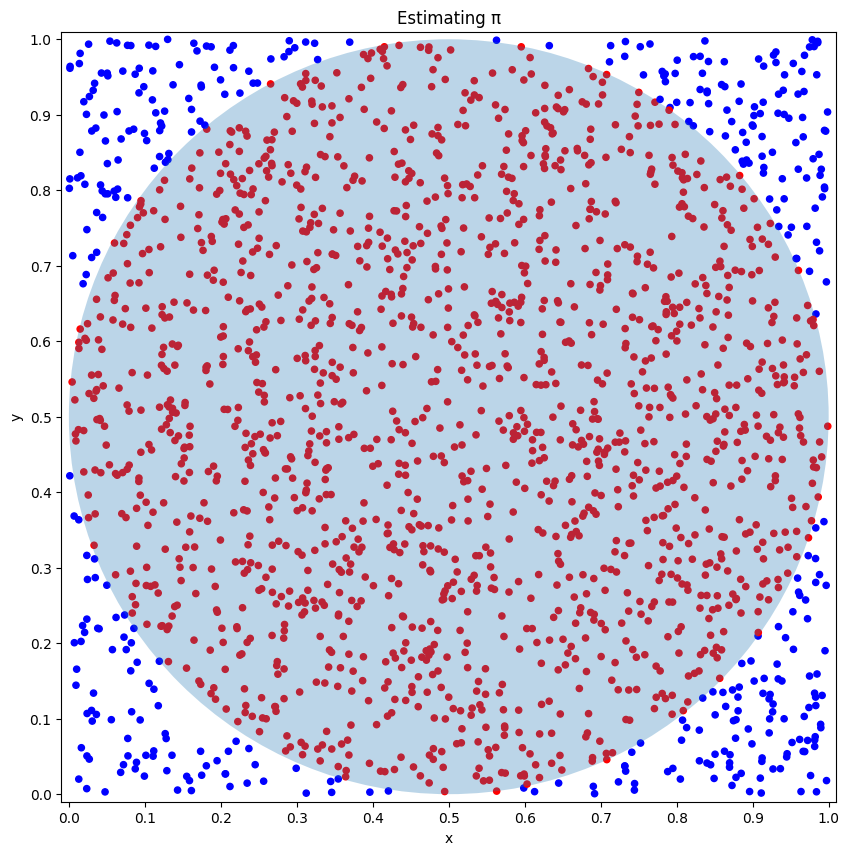

In [5]:
n_exp, step = 2000, 10
pi_estimate, df = approximate_pi(n_exp)
colors = ['r' if flag==1 else 'b' for flag in df.inside]
ax1 = df.plot.scatter(x='x', y='y', c=colors, figsize=(10,10))
circle1 = plt.Circle((0.5,0.5), 0.5, alpha=0.3) # circle with center at a (0.5,0.5)
ax1.add_patch(circle1)
ax1.set_xlim(-0.01, 1.01)
ax1.set_ylim(-0.01, 1.01)
ax1.set_xticks(np.arange(0,1.01, 0.1));
ax1.set_yticks(np.arange(0,1.01, 0.1));
ax1.set_title('Estimating π')

π estimate  3.14521


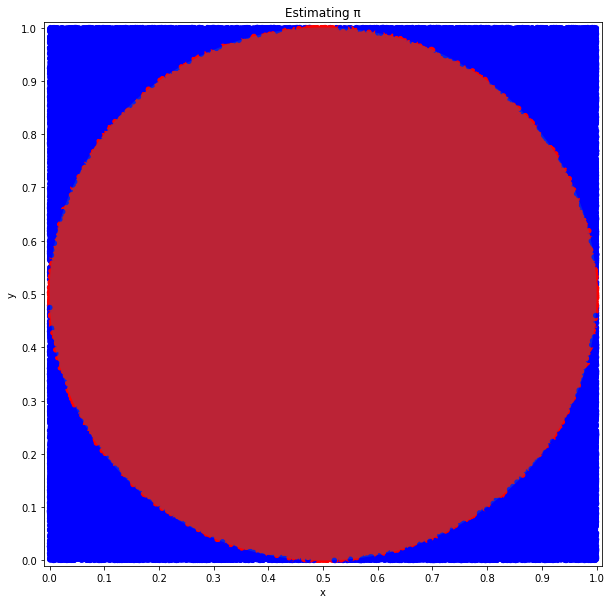

In [5]:
n_exp, step = 400000, 10000
pi_estimate, df = approximate_pi(n_exp)
colors = ['r' if flag==1 else 'b' for flag in df.inside]
ax1 = df.plot.scatter(x='x', y='y', c=colors, figsize=(10,10))
circle1 = plt.Circle((0.5,0.5), 0.5, alpha=0.3) # circle with center at a (0.5,0.5)
ax1.add_patch(circle1)
ax1.set_xlim(-0.01, 1.01)
ax1.set_ylim(-0.01, 1.01)
ax1.set_xticks(np.arange(0,1.01, 0.1));
ax1.set_yticks(np.arange(0,1.01, 0.1));
ax1.set_title('Estimating π')

Suppose we want to estimate π in this way with a certain level of accuracy (ε) and certain amount confidence. How do we choose the number of trials (parameter n_exp in the code)? We use the weak law of large numbers, and specifically the proof we saw using Chebyshev's inequality.  Let's set our confidence to be at least 99%, and ε=0.001. Then, we obtain by the WLLN 

$$Pr(|\frac{X_1+\ldots+X_n}{n}-\frac{\pi}{4}|\geq \epsilon)\leq \frac{\pi/4(1-\pi/4)}{n\epsilon^2}  \leq 1-0.99=0.01.$$ 

Therefore $$n \geq \frac{\pi/4(1-\pi/4)}{0.01 \epsilon^2}= \frac{\pi/4(1-\pi/4)}{0.01 0.001^2}=16854788.8
.$$

In [6]:
n0 = π/4*(1-π/4)/(0.01* 0.001**2)
required_samples = math.ceil(n0)
print(required_samples)

16854789
